In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
covid_data = pd.read_csv("data/covid-data.csv", low_memory=False)

In [3]:
print(f"Covid verisinde {covid_data.shape[0]} satır ve {covid_data.shape[1]} tane sütun vardır.")

Covid verisinde 232799 satır ve 67 tane sütun vardır.


**Veri üzerinde sütunlara göre null olmayan değer sayısının ve data typeların gösterilmesi**


In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232799 entries, 0 to 232798
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    232799 non-null  object 
 1   continent                                   219658 non-null  object 
 2   location                                    232799 non-null  object 
 3   date                                        232799 non-null  object 
 4   total_cases                                 219693 non-null  float64
 5   new_cases                                   219395 non-null  float64
 6   new_cases_smoothed                          218199 non-null  float64
 7   total_deaths                                200445 non-null  float64
 8   new_deaths                                  200370 non-null  float64
 9   new_deaths_smoothed                         199190 non-null  float64
 

**Veride bulunan sütunların gösterilmesi**

In [5]:
covid_data.columns.to_list()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

**Ülke sayısının hesaplanması**

In [6]:
covid_data["location"].nunique()

248

In [7]:
covid_data["location"].value_counts()

Argentina          1040
Mexico             1040
Thailand           1037
Taiwan             1025
High income        1019
                   ... 
Palau               441
Pitcairn            441
Niue                408
Northern Cyprus     317
Western Sahara        1
Name: location, Length: 248, dtype: int64

**Sütunlardaki kayıp verilerin toplamının hesaplanması**

In [8]:
covid_data.isna().sum()

iso_code                                        0
continent                                   13141
location                                        0
date                                            0
total_cases                                 13106
                                            ...  
population                                   1003
excess_mortality_cumulative_absolute       225033
excess_mortality_cumulative                225033
excess_mortality                           224982
excess_mortality_cumulative_per_million    225033
Length: 67, dtype: int64

**Verideki kayıpların sütunlara göre yüzdelik olarak gösterilmesi**

In [9]:
covid_data.isna().sum()/ covid_data.shape[0] * 100  

iso_code                                    0.000000
continent                                   5.644784
location                                    0.000000
date                                        0.000000
total_cases                                 5.629749
                                             ...    
population                                  0.430844
excess_mortality_cumulative_absolute       96.664075
excess_mortality_cumulative                96.664075
excess_mortality                           96.642168
excess_mortality_cumulative_per_million    96.664075
Length: 67, dtype: float64

**Kayıp oranının fazla olduğu 5 sütunun silinmesi**

In [10]:
covid_data.drop(["excess_mortality_cumulative_absolute",   
"excess_mortality_cumulative",               
"excess_mortality",                        
"excess_mortality_cumulative_per_million", "handwashing_facilities" ],axis=1,inplace=True)

**Ülkelere göre ortalama vaka sayısının hesaplanması**




In [11]:
mean_cases = covid_data.groupby('location')['new_cases'].mean()

mean_cases

location
Afghanistan          206.892276
Africa             12410.981946
Albania              342.639918
Algeria              274.986802
Andorra               47.587334
                      ...      
Western Sahara              NaN
World             618953.668302
Yemen                 12.722045
Zambia               346.505711
Zimbabwe             268.644792
Name: new_cases, Length: 248, dtype: float64

**Günlük ortalama vaka sayısının hesaplanması**

In [12]:
daily_new_cases_mean = covid_data["new_cases"].mean()

daily_new_cases_mean

12296.947546662412

**65 yaşından büyük vakaların toplamının hesaplanması**

In [13]:
aged_65_older = covid_data["aged_65_older"].sum()

aged_65_older

1637822.8730000001

**Ülkelerin insani gelişme indeksine göre gerekli aşı dozunu alan kişi sayısının gösterilmesi**

In [14]:
result = covid_data.groupby(["location","human_development_index"])["people_fully_vaccinated"].value_counts()
result 

location     human_development_index  people_fully_vaccinated
Afghanistan  0.511                    55624.0                    1
                                      77560.0                    1
                                      96910.0                    1
                                      111082.0                   1
                                      113739.0                   1
                                                                ..
Zimbabwe     0.571                    4747263.0                  1
                                      4748232.0                  1
                                      4748940.0                  1
                                      4750104.0                  1
                                      4751270.0                  1
Name: people_fully_vaccinated, Length: 46594, dtype: int64

**Ülkelerin insanı gelişim indeksine göre ölüm sayılarının gösterilmesi**

In [15]:
covid_data.groupby(["location","human_development_index"])["total_deaths"].value_counts()

location     human_development_index  total_deaths
Afghanistan  0.511                    7683.0          10
                                      7671.0           9
                                      7199.0           7
                                      7709.0           7
                                      7728.0           7
                                                      ..
Zimbabwe     0.571                    5564.0           1
                                      5576.0           1
                                      5578.0           1
                                      5579.0           1
                                      5586.0           1
Name: total_deaths, Length: 90591, dtype: int64

**Ülkelere göre  beklenen yaşam süresi ile 70 yaş üzeri vaka sayısının gösterilmesi**

In [16]:
covid_data.groupby(["location","life_expectancy"])["aged_70_older"].value_counts()

location             life_expectancy  aged_70_older
Afghanistan          64.83            1.337             986
Albania              78.57            8.643             985
Algeria              76.88            3.857             985
Angola               61.15            1.362             961
Antigua and Barbuda  77.02            4.631             968
                                                       ... 
Western Sahara       70.26            1.380               1
World                72.58            5.355            1019
Yemen                66.12            1.583             940
Zambia               63.89            1.542             963
Zimbabwe             61.49            1.882             961
Name: aged_70_older, Length: 195, dtype: int64

**Ölüm oranının yüzdelik olarak hesaplanması ve yeni bir sütun olarak eklenmesi**

In [17]:
covid_data['percent_dead'] = (covid_data['total_deaths'] / covid_data['population']) * 100
covid_data[['location', 'date', 'percent_dead']]

,location,date,percent_dead
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN
...,...,...,...
232794,Zimbabwe,2022-11-01,0.034349
232795,Zimbabwe,2022-11-02,0.034349
232796,Zimbabwe,2022-11-03,0.034349
232797,Zimbabwe,2022-11-04,0.034349


**Enfekte olmuş kişi sayısının yüzdelik olarak hesaplanması ve yeni bir sütun olarak eklenmesi**

In [18]:
covid_data['percent_infected'] = (covid_data['total_cases'] / covid_data['population']) * 100
covid_data[['location', 'date', 'percent_infected']]

,location,date,percent_infected
0,Afghanistan,2020-02-24,0.000012
1,Afghanistan,2020-02-25,0.000012
2,Afghanistan,2020-02-26,0.000012
3,Afghanistan,2020-02-27,0.000012
4,Afghanistan,2020-02-28,0.000012
...,...,...,...
232794,Zimbabwe,2022-11-01,1.580175
232795,Zimbabwe,2022-11-02,1.580175
232796,Zimbabwe,2022-11-03,1.580175
232797,Zimbabwe,2022-11-04,1.580175


**Aşılama oranının yüzdelik olarak hesaplanması ve yeni bir sütun olarak eklenmesi**

In [19]:
covid_data['percent_vaxed'] = (covid_data['people_vaccinated'] / covid_data['population']) * 100
covid_data[['location', 'date', 'percent_vaxed']]

,location,date,percent_vaxed
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN
...,...,...,...
232794,Zimbabwe,2022-11-01,NaN
232795,Zimbabwe,2022-11-02,NaN
232796,Zimbabwe,2022-11-03,NaN
232797,Zimbabwe,2022-11-04,NaN


**Kıtalara göre verilerin hesaplanması**

In [20]:
covid_data['continent'].value_counts(dropna=False)

Europe           53285
Africa           52893
Asia             49231
North America    35143
Oceania          16404
NaN              13141
South America    12702
Name: continent, dtype: int64

In [21]:
covid_data[covid_data['continent'].isna()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,percent_dead,percent_infected,percent_vaxed
986,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN
987,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,7.009002e-08,NaN
988,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,7.009002e-08,NaN
989,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,7.009002e-08,NaN
990,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,7.009002e-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229930,OWID_WRL,NaN,World,2022-11-01,630844621.0,380780.0,329305.000,6592971.0,2639.0,1505.857,...,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09,0.082669,7.910173e+00,68.150567
229931,OWID_WRL,NaN,World,2022-11-02,631239490.0,394869.0,321420.429,6594658.0,1688.0,1405.143,...,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09,0.082691,7.915124e+00,68.151387
229932,OWID_WRL,NaN,World,2022-11-03,631709423.0,469933.0,322836.429,6597538.0,2880.0,1536.571,...,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09,0.082727,7.921017e+00,68.153575
229933,OWID_WRL,NaN,World,2022-11-04,632134315.0,424892.0,333663.000,6599390.0,1852.0,1605.429,...,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09,0.082750,7.926345e+00,68.167462


**Kıta verisi NaN olan 13141 veri olmadan ülkelere ait satırların alınması**

In [22]:
covid_countries = covid_data[~covid_data['continent'].isna()]
covid_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,percent_dead,percent_infected,percent_vaxed
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0,NaN,0.000012,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0,NaN,0.000012,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0,NaN,0.000012,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0,NaN,0.000012,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0,NaN,0.000012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232794,ZWE,Africa,Zimbabwe,2022-11-01,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0,0.034349,1.580175,NaN
232795,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0,0.034349,1.580175,NaN
232796,ZWE,Africa,Zimbabwe,2022-11-03,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0,0.034349,1.580175,NaN
232797,ZWE,Africa,Zimbabwe,2022-11-04,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0,0.034349,1.580175,NaN


In [23]:
covid_countries['continent'].value_counts(dropna=False)

Europe           53285
Africa           52893
Asia             49231
North America    35143
Oceania          16404
South America    12702
Name: continent, dtype: int64

**Hindistan'ın verilerinin incelenmesi**

In [24]:
india_cases = covid_data[covid_data["location"] == "India"]

india_cases.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,percent_dead,percent_infected,percent_vaxed
95868,IND,Asia,India,2022-11-01,44655828.0,1190.0,1437.143,530452.0,1375.0,210.143,...,10.39,1.9,20.6,0.53,69.66,0.645,1.417173e+09,0.037430,3.151050,72.458649
95869,IND,Asia,India,2022-11-02,44655926.0,98.0,1292.286,530461.0,9.0,210.571,...,10.39,1.9,20.6,0.53,69.66,0.645,1.417173e+09,0.037431,3.151057,72.459137
95870,IND,Asia,India,2022-11-03,44658365.0,2439.0,1325.286,530479.0,18.0,211.429,...,10.39,1.9,20.6,0.53,69.66,0.645,1.417173e+09,0.037432,3.151229,72.459773
95871,IND,Asia,India,2022-11-04,44659447.0,1082.0,1255.000,530486.0,7.0,211.143,...,10.39,1.9,20.6,0.53,69.66,0.645,1.417173e+09,0.037433,3.151305,72.460558
95872,IND,Asia,India,2022-11-05,44660579.0,1132.0,1189.000,530500.0,14.0,212.000,...,10.39,1.9,20.6,0.53,69.66,0.645,1.417173e+09,0.037434,3.151385,72.461238


**Hindistan'ın günlük vaka sayısının görselleştirilmesi**

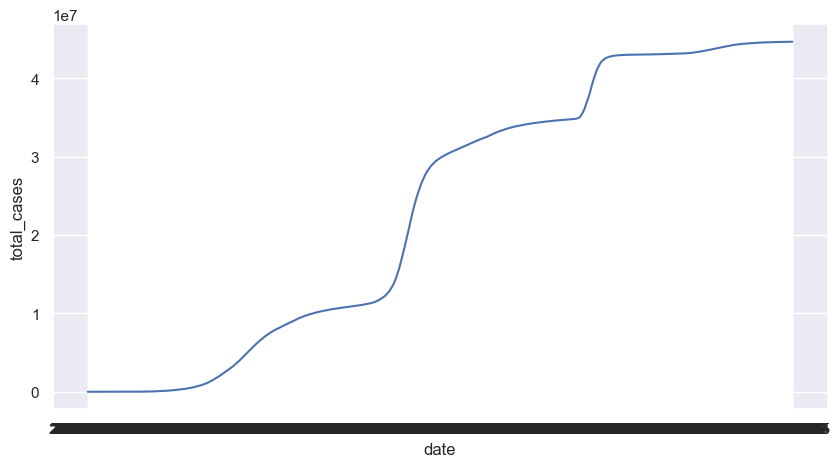

In [25]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.lineplot(x = "date", y = "total_cases", data=india_cases)
plt.show()

**Hindistan'da son 5 günde yaşanan vakaların incelenmesi**

In [26]:
india_last_5_days = india_cases.tail()

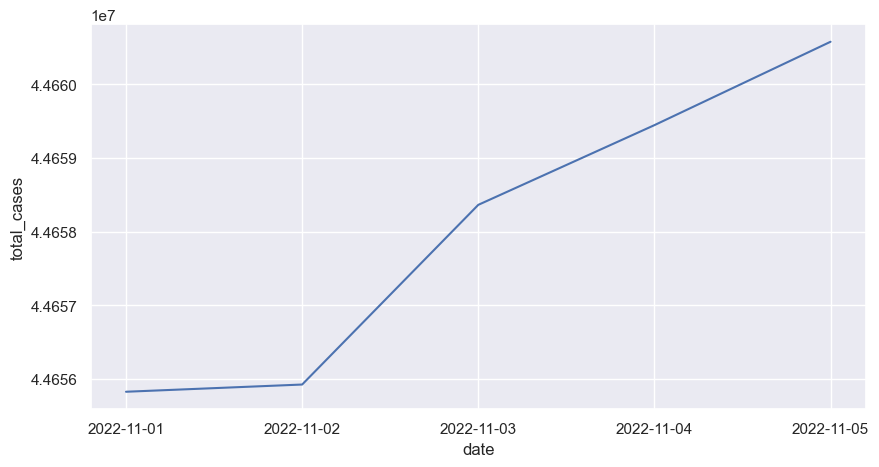

In [27]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.lineplot(x = "date", y = "total_cases", data=india_last_5_days)
plt.show()

**Hindistan'ın günlük test sayısının görselleştirilmesi**

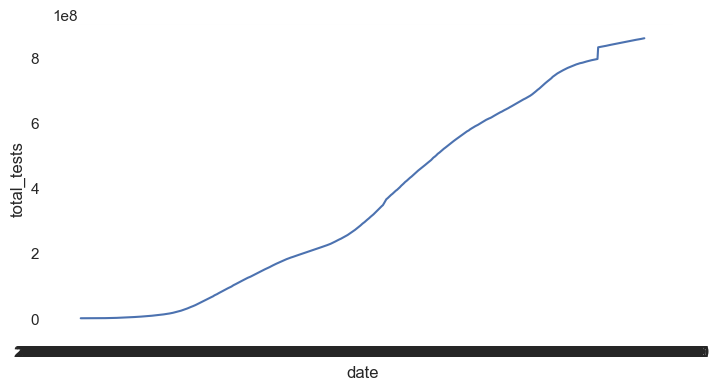

In [28]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.lineplot(x = "date", y = "total_tests", data=india_cases)
plt.show()

**Veride bulunan son gün bilgilerine bakarak toplam vaka sayısı en fazla olan 5 ülkenin hesaplanması**

In [29]:
last_day_cases = covid_countries[covid_countries["date"] == "2022-11-05"]

In [30]:
max_cases = last_day_cases.sort_values(by = "total_cases", ascending=False)
max_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,percent_dead,percent_infected,percent_vaxed
219762,USA,North America,United States,2022-11-05,97734261.0,4608.0,39628.571,1072582.0,21.0,314.143,...,10.79,19.1,24.6,2.77,78.86,0.926,3.382899e+08,0.317060,28.890686,NaN
95872,IND,Asia,India,2022-11-05,44660579.0,1132.0,1189.000,530500.0,14.0,212.000,...,10.39,1.9,20.6,0.53,69.66,0.645,1.417173e+09,0.037434,3.151385,72.461238
73934,FRA,Europe,France,2022-11-05,36982388.0,NaN,NaN,157346.0,NaN,NaN,...,4.77,30.1,35.6,5.98,82.66,0.901,6.781300e+07,0.232029,54.535838,NaN
78831,DEU,Europe,Germany,2022-11-05,35823771.0,NaN,NaN,154535.0,NaN,NaN,...,8.31,28.2,33.1,8.00,81.33,0.947,8.336984e+07,0.185361,42.969701,NaN
29392,BRA,South America,Brazil,2022-11-05,34849063.0,NaN,NaN,688332.0,NaN,NaN,...,8.11,10.1,17.9,2.20,75.88,0.765,2.153135e+08,0.319688,16.185266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139685,MSR,North America,Montserrat,2022-11-05,1403.0,0.0,0.000,8.0,0.0,0.000,...,NaN,NaN,NaN,NaN,74.16,NaN,4.413000e+03,0.181283,31.792431,NaN
124461,MAC,Asia,Macao,2022-11-05,795.0,0.0,0.286,6.0,0.0,0.000,...,NaN,NaN,NaN,NaN,84.24,NaN,6.951800e+05,0.000863,0.114359,NaN
225234,VAT,Europe,Vatican,2022-11-05,29.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,8.080000e+02,NaN,3.589109,NaN
214782,TUV,Oceania,Tuvalu,2022-11-05,23.0,0.0,0.000,NaN,NaN,NaN,...,27.25,NaN,NaN,NaN,67.57,NaN,1.133500e+04,NaN,0.202911,NaN


In [31]:
max_cases[0:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,percent_dead,percent_infected,percent_vaxed
219762,USA,North America,United States,2022-11-05,97734261.0,4608.0,39628.571,1072582.0,21.0,314.143,...,10.79,19.1,24.6,2.77,78.86,0.926,3.382899e+08,0.317060,28.890686,NaN
95872,IND,Asia,India,2022-11-05,44660579.0,1132.0,1189.000,530500.0,14.0,212.000,...,10.39,1.9,20.6,0.53,69.66,0.645,1.417173e+09,0.037434,3.151385,72.461238
73934,FRA,Europe,France,2022-11-05,36982388.0,NaN,NaN,157346.0,NaN,NaN,...,4.77,30.1,35.6,5.98,82.66,0.901,6.781300e+07,0.232029,54.535838,NaN
78831,DEU,Europe,Germany,2022-11-05,35823771.0,NaN,NaN,154535.0,NaN,NaN,...,8.31,28.2,33.1,8.00,81.33,0.947,8.336984e+07,0.185361,42.969701,NaN
29392,BRA,South America,Brazil,2022-11-05,34849063.0,NaN,NaN,688332.0,NaN,NaN,...,8.11,10.1,17.9,2.20,75.88,0.765,2.153135e+08,0.319688,16.185266,NaN


**Son günde toplam vaka sayısı en fazla olan 5 ülkenin bilgilerinin görselleştirilmesi**

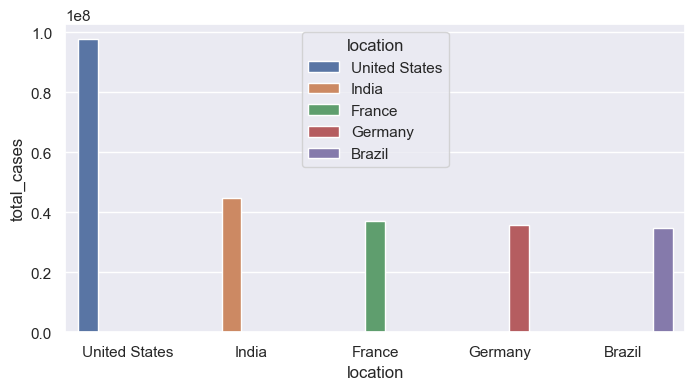

In [32]:
sns.barplot(x="location", y = "total_cases", data=max_cases[0:5], hue="location")
plt.show()

**Son günde toplam vaka sayısı en fazla olan 5 ülkenin enfekte olma yüzdelerinin görselleştirilmesi**

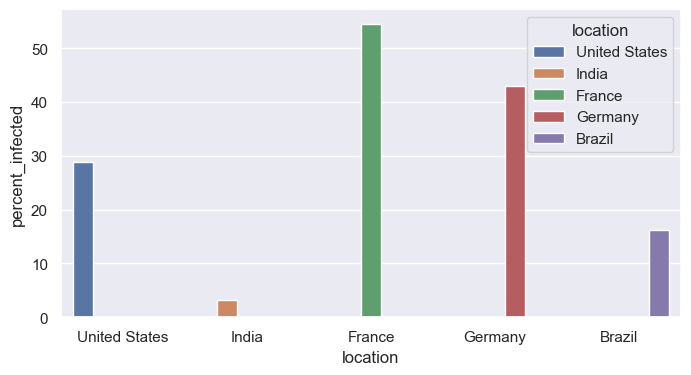

In [33]:
sns.barplot(x="location", y = "percent_infected", data=max_cases[0:5], hue="location")
plt.show()

**Son gün verilerine bakarak toplam vaka sayısı en fazla olan 5 ülkenin ölüm yüzdelerinin karşılaştırılması**

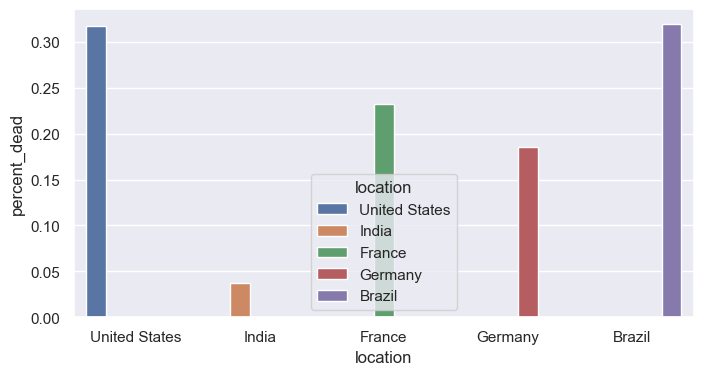

In [34]:
sns.barplot(x="location", y = "percent_dead", data=max_cases[0:5], hue="location")
plt.show()

**Son gün verilerine bakarak yoğun bakım ünitelerinde yatan hasta sayısı en fazla olan 5 ülkenin hesaplanması**

In [35]:
icu_patients = last_day_cases.sort_values(by = "icu_patients", ascending=False)

icu_patients[:5]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,percent_dead,percent_infected,percent_vaxed
985,AFG,Asia,Afghanistan,2022-11-05,203574.0,77.0,105.714,7826.0,1.0,0.714,...,9.59,NaN,NaN,0.50,64.83,0.511,41128772.0,0.019028,0.494967,NaN
2967,ALB,Europe,Albania,2022-11-05,333046.0,19.0,13.857,3593.0,0.0,0.000,...,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0,0.126411,11.717408,NaN
3952,DZA,Africa,Algeria,2022-11-05,270862.0,6.0,4.714,6881.0,0.0,0.000,...,6.73,0.7,30.4,1.90,76.88,0.748,44903228.0,0.015324,0.603213,NaN
4931,AND,Europe,Andorra,2022-11-05,46588.0,0.0,7.571,155.0,0.0,0.000,...,7.97,29.0,37.8,NaN,83.73,0.868,79843.0,0.194131,58.349511,NaN
5892,AGO,Africa,Angola,2022-11-05,103131.0,0.0,0.000,1917.0,0.0,0.000,...,3.94,NaN,NaN,NaN,61.15,0.581,35588996.0,0.005386,0.289783,NaN


**Toplam popülasyonda 100 kişi başına uygulanan toplam COVID-19 aşı dozu sayısının hesaplanması**

In [36]:
np.unique(covid_data['location'])
df1 = covid_data[covid_data['location'].str.contains('World|High income|Asia|Upper middle income|South America|Europe|European Union|Oceania|North Amercia|Lower middle income|Africa')==False]
vaccinated_per_hundred = df1.groupby('location').max()['people_fully_vaccinated_per_hundred'].sort_values(ascending=False)
vaccinated_per_hundred[0:10]


C:\Users\elvan\AppData\Local\Temp\ipykernel_860\3712181229.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  vaccinated_per_hundred = df1.groupby('location').max()['people_fully_vaccinated_per_hundred'].sort_values(ascending=False)


location
Gibraltar               126.76
Qatar                   105.66
United Arab Emirates    103.72
Pitcairn                100.00
Brunei                   99.20
Singapore                90.90
Chile                    90.23
Hong Kong                89.91
China                    89.22
Cuba                     89.18
Name: people_fully_vaccinated_per_hundred, dtype: float64

**Toplam popülasyonda 100 kişi başına uygulanan toplam COVID-19 aşı dozu sayısı en fazla olan 10 ülkenin görselleştirilmesi**

<AxesSubplot:xlabel='location'>

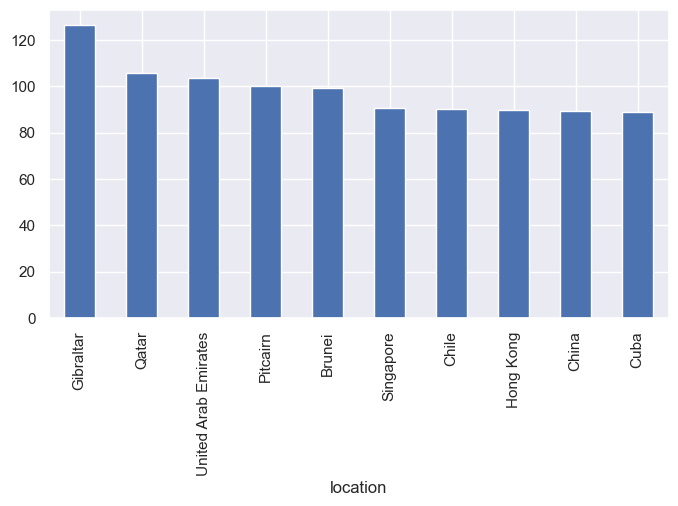

In [37]:
vaccinated_per_hundred[0:10].plot.bar()

**Bir haftada yoğun bakım ünitelerine kabul edilen COVID-19 hastalarının sayısına göre ülkelerin sıralanması**

In [38]:
tests_per_thousand = df1.groupby('location').max()['weekly_icu_admissions'].sort_values(ascending=False)

tests_per_thousand[:5]


C:\Users\elvan\AppData\Local\Temp\ipykernel_860\3817520563.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  tests_per_thousand = df1.groupby('location').max()['weekly_icu_admissions'].sort_values(ascending=False)


location
Bulgaria    5479.0
France      4838.0
Germany     2445.0
Spain       2334.0
Italy       1892.0
Name: weekly_icu_admissions, dtype: float64

**Bir haftada yoğun bakım ünitelerine kabul edilen COVID-19 hastalarının sayısı en yüksek olan 5 ülke sıralamasının görselleştirilmesi**

<AxesSubplot:xlabel='location'>

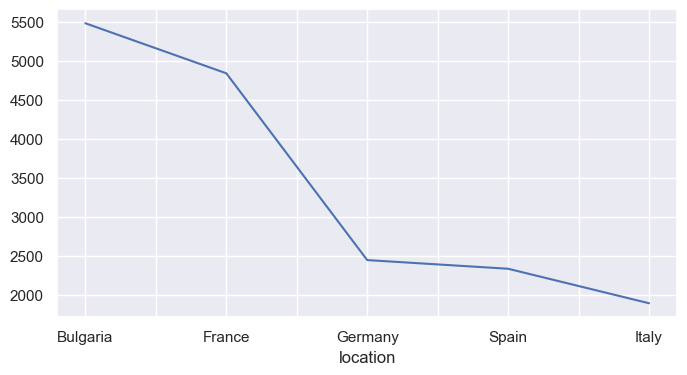

In [39]:
tests_per_thousand[:5].plot.line()


**Ölüm oranı en yüksek olan 10 ülkenin sıralanması**

In [40]:
max_death_percent = df1.groupby('location').max()['percent_dead'].sort_values(ascending=False)

max_death_percent[:10]


C:\Users\elvan\AppData\Local\Temp\ipykernel_860\4089692145.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_death_percent = df1.groupby('location').max()['percent_dead'].sort_values(ascending=False)


location
Peru                      0.637508
Bulgaria                  0.559072
Bosnia and Herzegovina    0.500382
Hungary                   0.480953
North Macedonia           0.456819
Georgia                   0.451663
Montenegro                0.444439
Croatia                   0.426389
Czechia                   0.396875
Slovakia                  0.365538
Name: percent_dead, dtype: float64

**Ölüm oranı en yüksek olan ilk 10 ülkenin görselleştirilmesi**

<AxesSubplot:xlabel='location'>

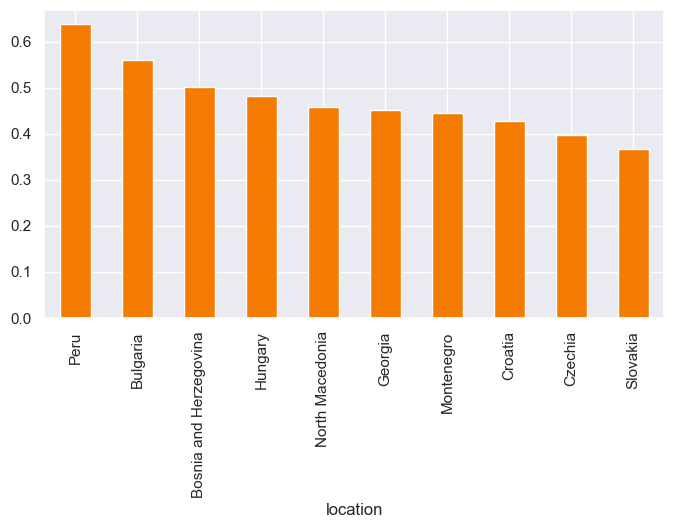

In [41]:
max_death_percent[:10].plot.bar(color="#F57C02")

**Ölüm oranı en düşük olan ülkelerin sıralanması**

In [42]:
min_death_percent = df1.groupby('location').min()['percent_dead'].sort_values(ascending=False)

min_death_percent[:10]

C:\Users\elvan\AppData\Local\Temp\ipykernel_860\1559781710.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_death_percent = df1.groupby('location').min()['percent_dead'].sort_values(ascending=False)


location
Montserrat                         0.022660
Saint Pierre and Miquelon          0.016992
Wallis and Futuna                  0.008624
Nauru                              0.007880
Anguilla                           0.006298
Cook Islands                       0.005871
Palau                              0.005530
Bonaire Sint Eustatius and Saba    0.003697
British Virgin Islands             0.003192
Bermuda                            0.003115
Name: percent_dead, dtype: float64

<AxesSubplot:xlabel='location'>

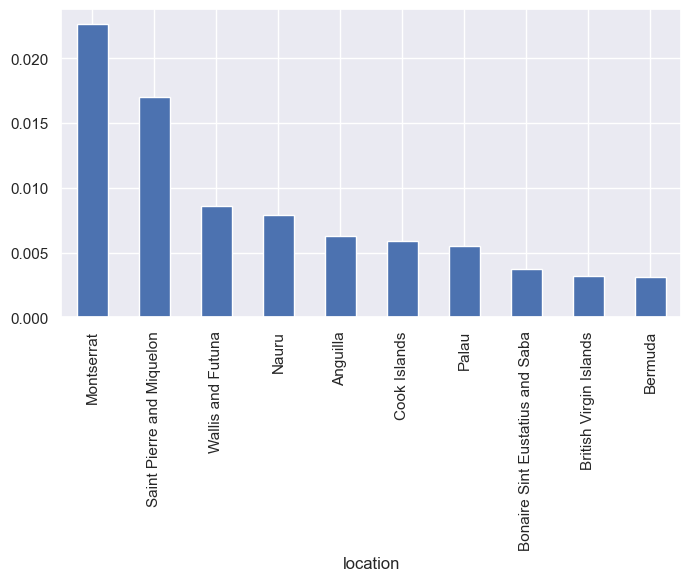

In [43]:
min_death_percent[:10].plot.bar()